### 포켓몬 데이터 분석

### 학습 내용
 * 포켓몬 데이터에 대해 분석을 수행해 본다.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

### 데이터 확인

In [5]:
data = pd.read_csv("Pokemon.csv")
print(data.shape)
data

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### #행 삭제

In [7]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
data.drop(['#'], axis=1, inplace=True)
data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### 결측치 처리

In [10]:
data['Type 2'].replace(np.nan, '0', inplace = True) #null값 채워주기

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [12]:
print("Number of pokemon are: " + str(data['Name'].nunique())) #포켓몬 종류

Number of pokemon are: 800


In [13]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [16]:
poke_total = data.copy()
print(poke_total.columns) #컬럼명확인

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [17]:
poke_total = pd.concat([poke_total['Name'], data['Total']], axis=1)
poke_total

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309
...,...,...
795,Diancie,600
796,DiancieMega Diancie,700
797,HoopaHoopa Confined,600
798,HoopaHoopa Unbound,680


### 시각화

In [18]:
data_p = poke_total.sort_values(by='Total', ascending=False)
data_p

,Name,Total
426,RayquazaMega Rayquaza,780
164,MewtwoMega Mewtwo Y,780
163,MewtwoMega Mewtwo X,780
422,KyogrePrimal Kyogre,770
424,GroudonPrimal Groudon,770
...,...,...
13,Caterpie,195
288,Wurmple,195
446,Kricketot,194
322,Azurill,190


### 포켓몬 종류별 개체수 상위 20

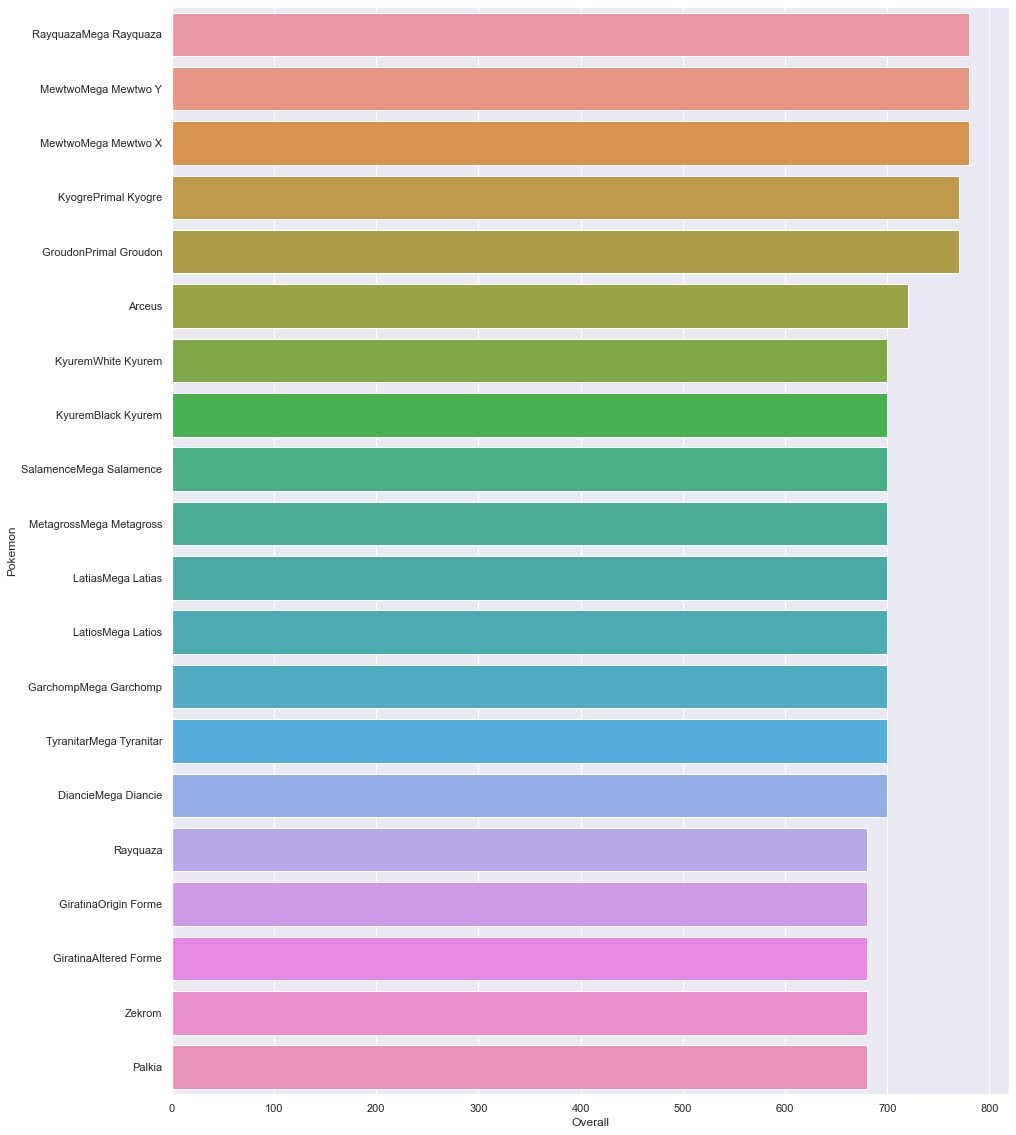

In [22]:
sns.set()
plt.figure(figsize=(15,20))
ax = sns.barplot(x='Total',
                 y='Name',
                 data=data_p.head(20))
ax.set(xlabel='Overall', ylabel='Pokemon')
plt.show()

In [23]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [24]:
g = nx.Graph()
g = nx.nx.from_pandas_edgelist(data, source='Name', target='Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 800
Average degree:   1.9560


In [25]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g, k=0.15)
nx.draw_networkx(g, pos, node_size=25, node_color='blue')
plt.show()

NetworkXError: random_state_index is incorrect

<Figure size 1440x1440 with 0 Axes>

### type1 별 비율
 * 물속성의 포켓몬의 개체수가 가장 많고, 요정속성의 포켓몬 개체수가 가장 적은 것을 확인 가능.

In [27]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [28]:
data.Generation.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

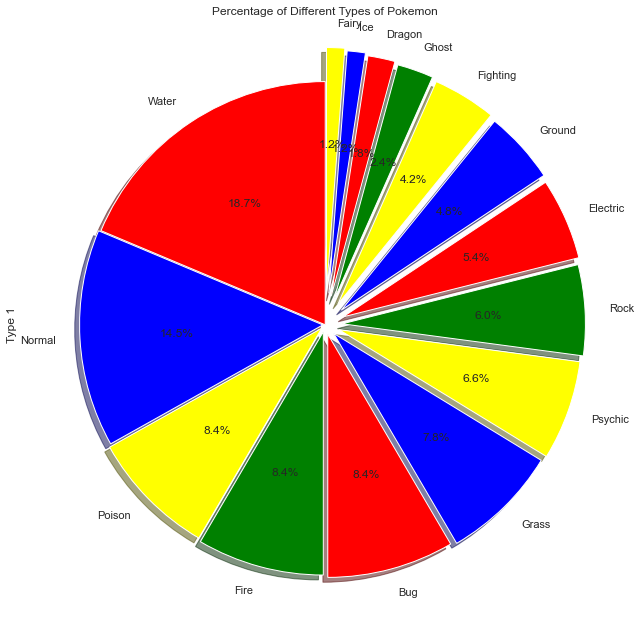

In [26]:
gen1 = data[data.Generation == 1]
types = gen1['Type 1']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'red',
    'blue',
    'yellow',
    'green'
]

types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Different Types of Pokemon",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(9,9)
)

plt.tight_layout()
plt.show()

In [30]:
gen1.Legendary.unique()

array([False,  True])

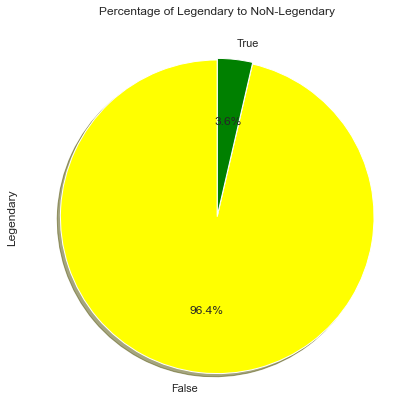

In [31]:
types = gen1['Legendary']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'yellow',
    'green'
]

types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Legendary to NoN-Legendary",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(6,6)
)
plt.tight_layout()
plt.show()

In [ ]:
nx.from

In [32]:
g = nx.from_pandas_dataframe(gen1,source='Name',target='Type 1')
print(nx.info(g))
nx.Graph()
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.0319)
nx.draw_networkx(g,pos,node_size=805, node_color='pink', font_size=15)
plt.show()

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

In [33]:
import networkx as nx

In [34]:
G = nx.Graph()

In [35]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


In [37]:
G.add_node("A")

In [38]:
G.add_nodes_from(["B","C","D","E"])

In [39]:
G.add_edge(*("A","B"))

In [40]:
G.add_edges_from([("A","C"), ("B","D"), ("B","E"), ("C","E")])

In [41]:
print("Vertex set: ",G.nodes())

Vertex set:  ['A', 'B', 'C', 'D', 'E']


In [44]:
print("Edge set: ",G.edges())

Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]


In [42]:
import matplotlib.pyplot as plt

NetworkXError: random_state_index is incorrect

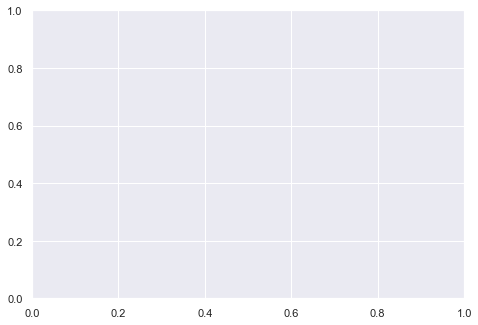

In [43]:
nx.draw(G)
plt.show() 